In [11]:
# --- Step 1: Import libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


✅ Data Loaded Successfully!
📊 Columns available: ['id', 'name', 'absolute_magnitude_h', 'estimated_diameter_min_km', 'estimated_diameter_max_km', 'is_potentially_hazardous', 'close_approach_date', 'relative_velocity_km_s', 'miss_distance_au', 'orbiting_body']
🎯 Target column detected: 'is_potentially_hazardous'
🧠 Using features: ['absolute_magnitude_h', 'orbiting_body']

✅ Model Evaluation:
Accuracy: 0.884

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1671
           1       0.33      0.90      0.48       105

    accuracy                           0.88      1776
   macro avg       0.66      0.89      0.71      1776
weighted avg       0.95      0.88      0.91      1776


Confusion Matrix:
 [[1476  195]
 [  11   94]]


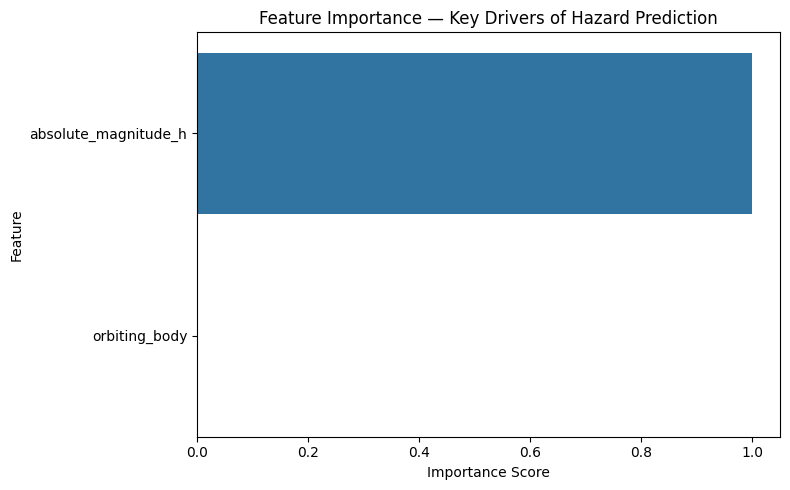

✅ Data Loaded Successfully!
📊 Columns in dataset: ['id', 'name', 'absolute_magnitude_h', 'estimated_diameter_min_km', 'estimated_diameter_max_km', 'is_potentially_hazardous', 'close_approach_date', 'relative_velocity_km_s', 'miss_distance_au', 'orbiting_body']

🎯 Target column detected automatically: is_potentially_hazardous
🧠 Using features: ['absolute_magnitude_h', 'orbiting_body']

✅ Model Evaluation:
Accuracy: 0.884

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1671
           1       0.33      0.90      0.48       105

    accuracy                           0.88      1776
   macro avg       0.66      0.89      0.71      1776
weighted avg       0.95      0.88      0.91      1776


Confusion Matrix:
 [[1476  195]
 [  11   94]]


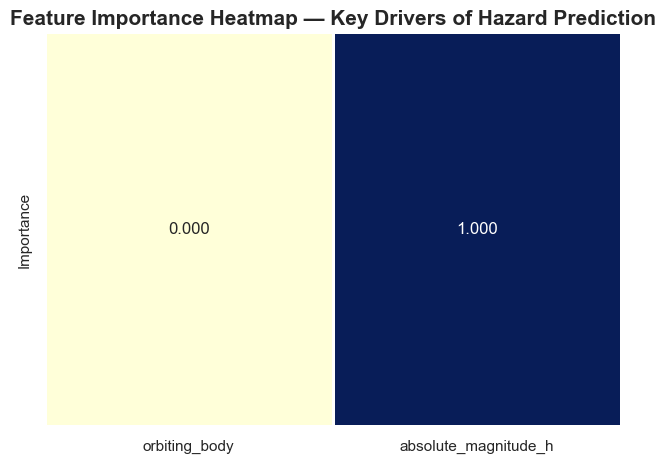

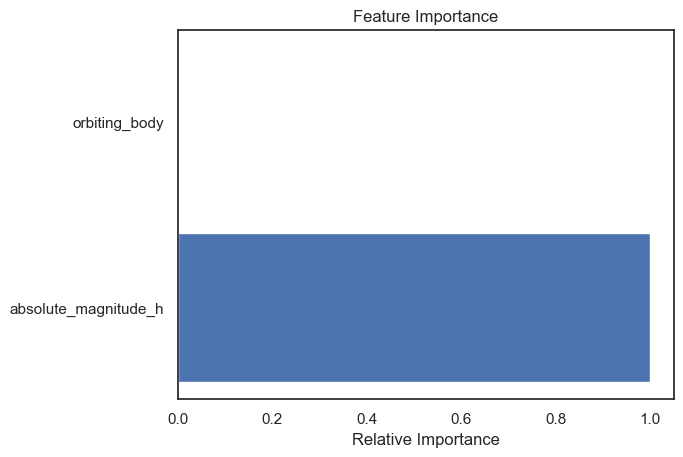

In [23]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 2: Load dataset ---
file_path = r"C:\Users\EXTECH\Downloads\NASA Near-Earth Object (NEO) Dataset.csv"
df = pd.read_csv(file_path)

print("✅ Data Loaded Successfully!")
print("📊 Columns in dataset:", list(df.columns))

# --- Step 3: Clean dataset ---
df.columns = df.columns.str.strip()  # remove spaces in column names
df.drop_duplicates(inplace=True)

# --- Step 4: Identify hazard column automatically ---
# Search for any column that likely indicates hazard status
possible_targets = [col for col in df.columns if "hazard" in col.lower() or "potentially" in col.lower()]

if not possible_targets:
    print("\n⚠️ No explicit 'hazard' column found.")
    print("Available columns:", list(df.columns))
    print("👉 Please check your dataset and confirm which column indicates whether the object is hazardous.")
else:
    target_col = possible_targets[0]
    print(f"\n🎯 Target column detected automatically: {target_col}")

    # Drop rows where target is missing
    df.dropna(subset=[target_col], inplace=True)

    # --- Step 5: Select features dynamically ---
    possible_features = [
        "absolute_magnitude_h",
        "estimated_diameter_min",
        "estimated_diameter_max",
        "relative_velocity_km_per_hr",
        "miss_distance_kilometers",
        "orbiting_body"
    ]
    features = [f for f in possible_features if f in df.columns]
    print(f"🧠 Using features: {features}")

    # Convert categorical columns if present
    if "orbiting_body" in df.columns:
        df["orbiting_body"] = df["orbiting_body"].astype("category").cat.codes

    # Prepare data
    X = df[features]
    y = df[target_col].astype(int) if df[target_col].dtype != "int64" else df[target_col]

    # --- Step 6: Split dataset ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- Step 7: Train Random Forest Model ---
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42,
        class_weight="balanced"
    )
    rf_model.fit(X_train, y_train)

    # --- Step 8: Evaluate Model ---
    y_pred = rf_model.predict(X_test)

    print("\n✅ Model Evaluation:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # --- Step 9: Feature Importance ---
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
   
sns.set(style="white")

# Convert to dataframe for seaborn heatmap
import pandas as pd
imp_df = pd.DataFrame({
    'Feature': np.array(X.columns)[indices],
    'Importance': importances[indices]
})

imp_df = imp_df.sort_values(by="Importance", ascending=True)

sns.heatmap(
    imp_df.set_index('Feature').T, 
    cmap='YlGnBu', 
    annot=True, 
    fmt=".3f",
    linewidths=1, 
    cbar=False
)

plt.title("Feature Importance Heatmap — Key Drivers of Hazard Prediction", fontsize=15, fontweight='bold')
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()
plt.title("Feature Importance")
plt.barh(range(len(features)), importances[indices], align='center')
plt.yticks(range(len(features)), np.array(features)[indices])
plt.xlabel("Relative Importance")
plt.show()  
    

✅ Data Loaded Successfully!
📊 Columns available: ['id', 'name', 'absolute_magnitude_h', 'estimated_diameter_min_km', 'estimated_diameter_max_km', 'is_potentially_hazardous', 'close_approach_date', 'relative_velocity_km_s', 'miss_distance_au', 'orbiting_body']
🎯 Target column detected: 'is_potentially_hazardous'
🧠 Using features: ['absolute_magnitude_h', 'orbiting_body']

✅ Model Evaluation:
Accuracy: 0.884

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1671
           1       0.33      0.90      0.48       105

    accuracy                           0.88      1776
   macro avg       0.66      0.89      0.71      1776
weighted avg       0.95      0.88      0.91      1776


Confusion Matrix:
 [[1476  195]
 [  11   94]]


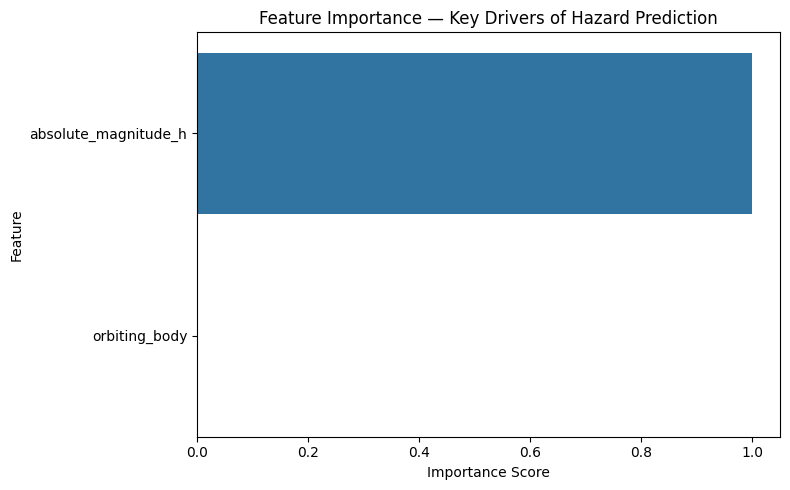